In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Reviews.csv")
df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


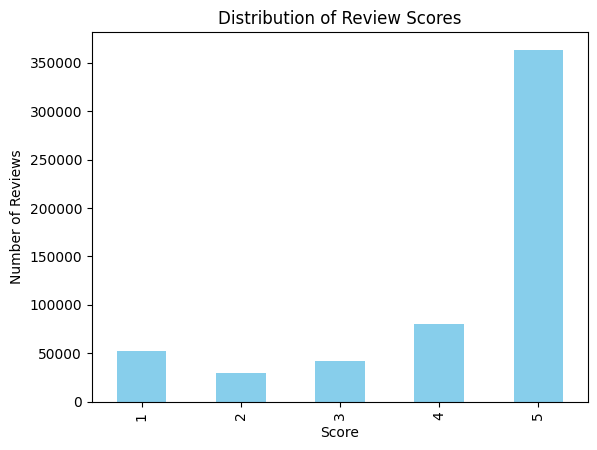

In [3]:
df['Score'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Review Scores')
plt.xlabel('Score')
plt.ylabel('Number of Reviews')
plt.show()

In [4]:
top_products = df['ProductId'].value_counts().head(10)
print("Top 10 products with most reviews:")
print(top_products)

Top 10 products with most reviews:
ProductId
B007JFMH8M    913
B002QWHJOU    632
B0026RQTGE    632
B002QWP89S    632
B002QWP8H0    632
B003B3OOPA    623
B001EO5Q64    567
B007M83302    564
B007M832YY    564
B0013NUGDE    564
Name: count, dtype: int64


In [5]:
product_scores = df.groupby('ProductId')['Score'].mean()

top_5 = product_scores.sort_values(ascending=False).head(5)
bottom_5 = product_scores.sort_values(ascending=True).head(5)

print("Top 5 products by average score:")
print(top_5)

print("\nBottom 5 products by average score:")
print(bottom_5)

Top 5 products by average score:
ProductId
B009WVB40S    5.0
B009PG8MVO    5.0
B009PFJUF2    5.0
B009PCDDO4    5.0
B009OY38SY    5.0
Name: Score, dtype: float64

Bottom 5 products by average score:
ProductId
B005ZVBYM2    1.0
B009O7B1I0    1.0
B009P4KMZA    1.0
B009UOFTUI    1.0
B00006IDJO    1.0
Name: Score, dtype: float64


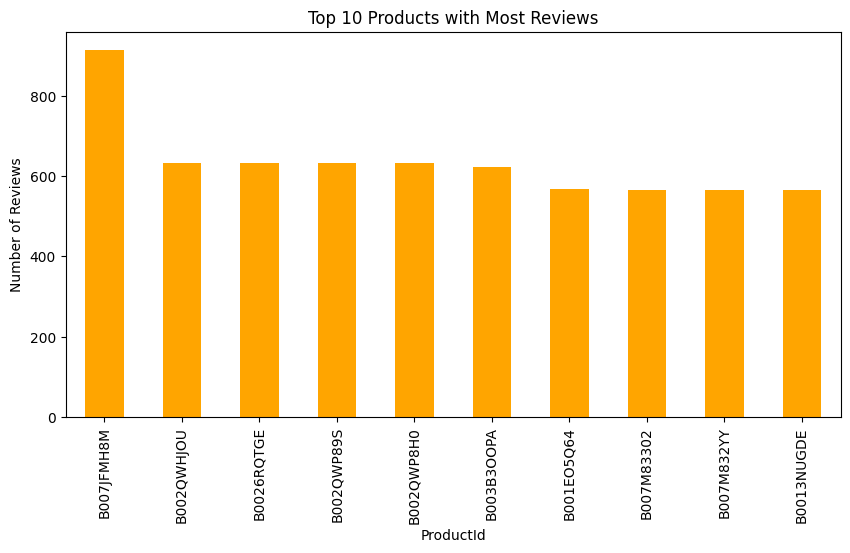

In [6]:
top_products.plot(kind='bar', figsize=(10,5), color='orange')
plt.title('Top 10 Products with Most Reviews')
plt.xlabel('ProductId')
plt.ylabel('Number of Reviews')
plt.show()

Sentiment
Positive    443777
Negative     82037
Neutral      42640
Name: count, dtype: int64


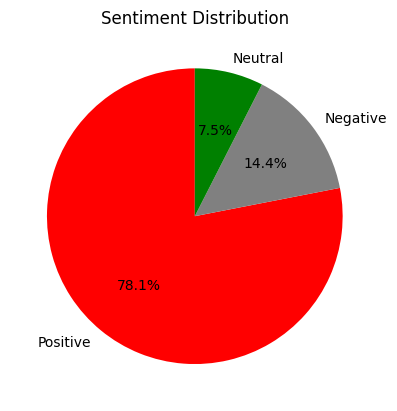

In [7]:
conditions = [
    (df['Score'] >= 4),
    (df['Score'] == 3),
    (df['Score'] <= 2)
]
choices = ['Positive', 'Neutral', 'Negative']

df['Sentiment'] = pd.cut(df['Score'], bins=[0,2,3,5], labels=['Negative', 'Neutral', 'Positive'])

sentiment_counts = df['Sentiment'].value_counts()
print(sentiment_counts)

sentiment_counts.plot(kind='pie', autopct='%1.1f%%', colors=['red', 'gray', 'green'], startangle=90)
plt.title('Sentiment Distribution')
plt.ylabel('')
plt.show()

In [9]:
# Prepare data and labels
df_ml = df[df['Score'] != 3].copy()
df_ml['Sentiment'] = df_ml['Score'].apply(lambda x: 1 if x >= 4 else 0)
print(df_ml['Sentiment'].value_counts())

X = df_ml['Text']
y = df_ml['Sentiment']

# Split dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the review text
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=10000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train and evaluate the classifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
model = MultinomialNB()
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Sentiment
1    443777
0     82037
Name: count, dtype: int64
Accuracy: 0.9055656457118949
              precision    recall  f1-score   support

           0       0.69      0.72      0.70     16379
           1       0.95      0.94      0.94     88784

    accuracy                           0.91    105163
   macro avg       0.82      0.83      0.82    105163
weighted avg       0.91      0.91      0.91    105163

